1.读取数据

In [20]:
D=1600
W=200
ID=4

import pickle
import sys

def read_data(D,W):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(D)+'_W='+str(W)
    
    with open(name+'_mouse_check.bin','rb') as file:
        check_datas=pickle.load(file)
    with open(name+'_mouse_move.bin','rb') as file:
        move_datas=pickle.load(file)
    with open(name+'_track.bin','rb') as file:
        track_datas=pickle.load(file)
    with open(name+'_information.bin','rb') as file:
        inf=pickle.load(file)
    
    return move_datas,check_datas,track_datas,inf

mouse_move,mouse_check,track,inf=read_data(D,W)

2.将轨迹数据转换为pd.DataFrame格式

In [21]:
import pandas as pd

Track={}
for i in range(len(track)):
    Track[i]=pd.DataFrame(track[i])
    Track[i].columns=['t','x','y']


3.计算轨迹数据中的其他相关项（速度，角度，距离）

In [22]:
import numpy as np

def setValue(Track):
    '''
    计算速度和时间
    '''
    trace=[]
    for i in range(len(Track)):
        T=Track[i].t.values
        X=Track[i].x.values
        Y=Track[i].y.values
        
        #将时间标准化
        t0=T[0]
        for i in range(len(T)):
            T[i]=T[i]-t0
            
        s=0
        S=[0,]#点在轨迹上的位置
        for i in range(1,len(X)):
            s+=np.sqrt((X[i]-X[i-1])**2+(Y[i]-Y[i-1])**2)
            S.append(s)
        
        v=[0,]
        alpha=[0,]
        for i in range(1,len(X)):
            
            v.append(np.sqrt((X[i]-X[i-1])**2+(Y[i]-Y[i-1])**2)/(T[i]-T[i-1]+1))
            #if X[i]!=X[i-1]:
                #print(X[i],X[i-1])
                #print(np.sqrt((X[i]-X[i-1])**2+(Y[i]-Y[i-1])**2)/(T[i]-T[i-1]+1))
            alpha.append(np.arctan((Y[i]-Y[i-1])/(X[i]-X[i-1]+1)))
        
        
        pandasDataSet=[]
        for i in range(len(X)):
            pandasDataSet.append((T[i],X[i],Y[i],S[i],v[i],alpha[i]))
        
        trace.append(pd.DataFrame(pandasDataSet,columns=['t','x','y','s','v','alpha']))
        
    return trace

Track=setValue(Track)
print(Track[0].head(5))


          t    x     y    s    v  alpha
0  0.000000  732  1013  0.0  0.0    0.0
1  0.001027  732  1013  0.0  0.0    0.0
2  0.001973  732  1013  0.0  0.0    0.0
3  0.002960  732  1013  0.0  0.0    0.0
4  0.003996  732  1013  0.0  0.0    0.0


4.绘制图像函数

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d


def plotdata(Track,x,y):
    colors=['red','blue','green','yellow','pink','purple','orange','gray','brown',]

    for i in range(len(Track)):
        X=np.array(Track[i][x].values.tolist())
        Y=np.array(Track[i][y].values.tolist())

        # 绘制原始数据和拟合曲线
        plt.scatter(X, Y, color='red',s=1)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(x+'-'+y)
        plt.legend()
        plt.grid(True)
        plt.show()

5.绘制x,y的散点图

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


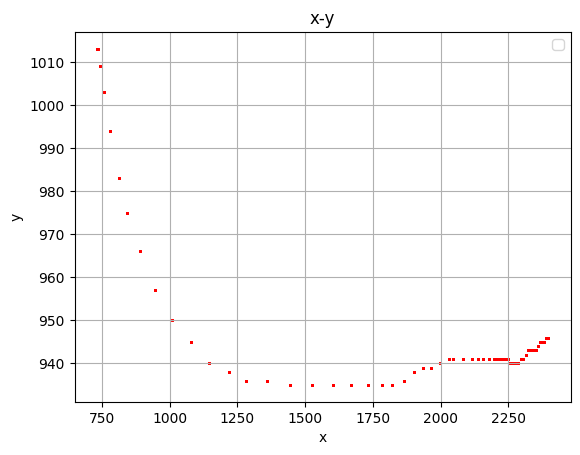

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


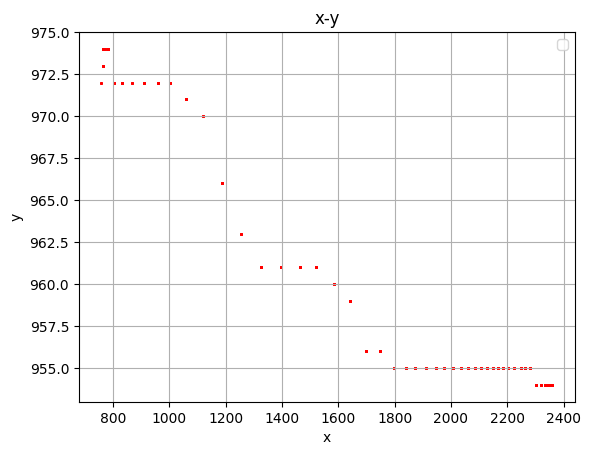

In [24]:
plotdata(Track,'x','y')

6.绘制s,t的散点图

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


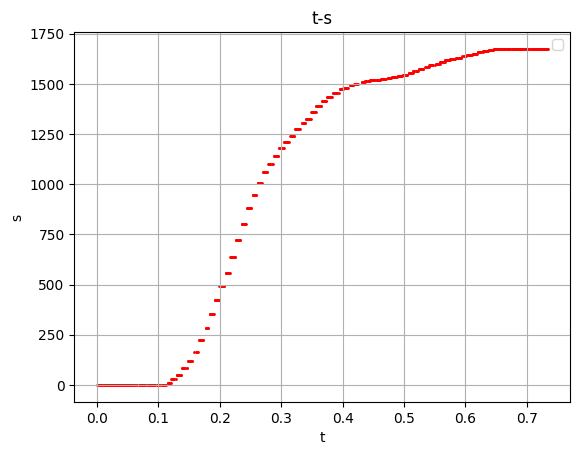

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


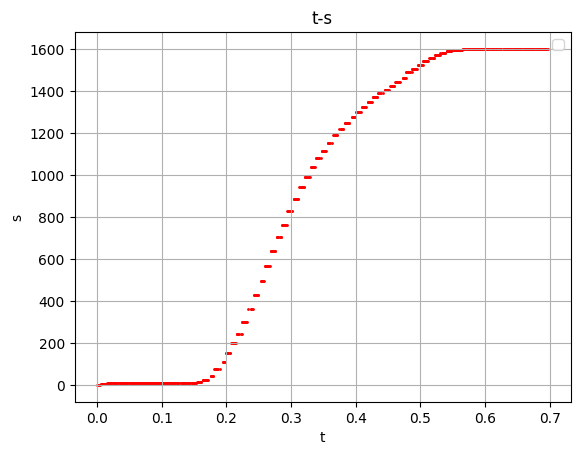

In [25]:
plotdata(Track,'t','s')

7.绘制v,t的散点图   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


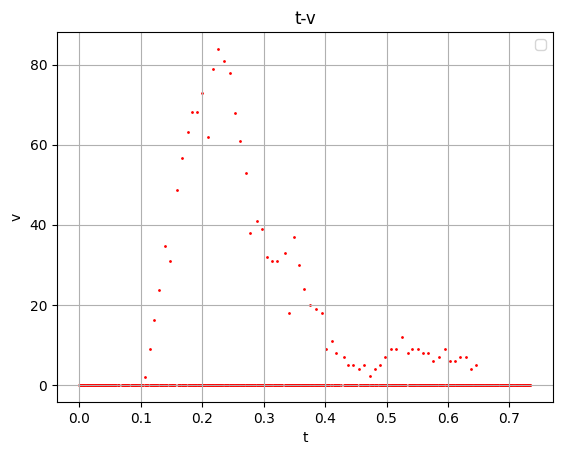

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


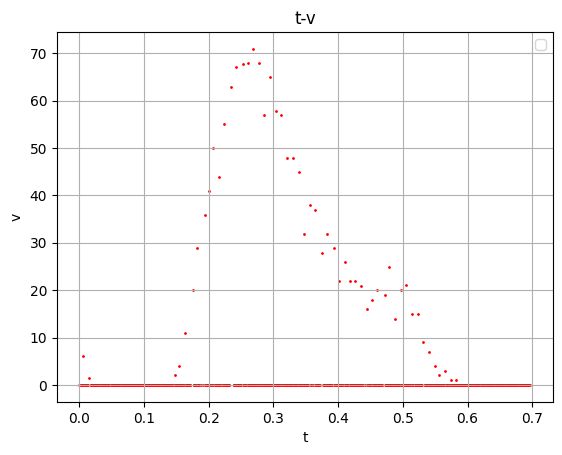

In [26]:
plotdata(Track,'t','v')